# Clasificando imágenes MNIST

Vamos a utilizar la red neuronal que desarrollamos para clasificar imágenes de números escritos a mano. La base de datos que usaremos se llama [MNIST](https://en.wikipedia.org/wiki/MNIST_database).

## Descargando datos

Vamos a descargar el set de datos desde la librería [scikit-learn](https://scikit-learn.org/stable/).

In [1]:
##importamos librerías a utilizar

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Cargar el conjunto de datos MNIST
mnist = fetch_openml('mnist_784', version=1)
data, y = mnist["data"].values, mnist["target"].to_numpy()

### Analizando los datos

Siempre es importante analizar qué datos tenemos, en este caso, vamos a hacer una rápida revisión para entender qué tipo de información estamos queriendo clasificar.

In [3]:
print(data.shape)
print(y.shape)

(70000, 784)
(70000,)


De lo anterior podemos ver que tenemos $70mil$ instancias o datos, donde cada una de estas posee $784$ *características*.

También podemos ver que tenemos $70mil$ etiquetas (variable $y$). Veamos qué contiene esta última.

In [4]:
y[:10]

array(['5', '0', '4', '1', '9', '2', '1', '3', '1', '4'], dtype=object)

In [5]:
##convierto las etiquetas a enteros
y = y.astype(np.uint8)
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

La variable $y$ contiene *las etiquetas* de cada número dentro de $X$.

In [6]:
print(data[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Vemos que las características de cada instancia son vectores con valores enteros entre 0 y 255.

Vamos a normalizar estos valores entre 0 y 1 para facilitar luego el entrenamiento de la red.

In [7]:
X = data.astype('float32')/255

Podemos graficas algunos de estos números, veamos.

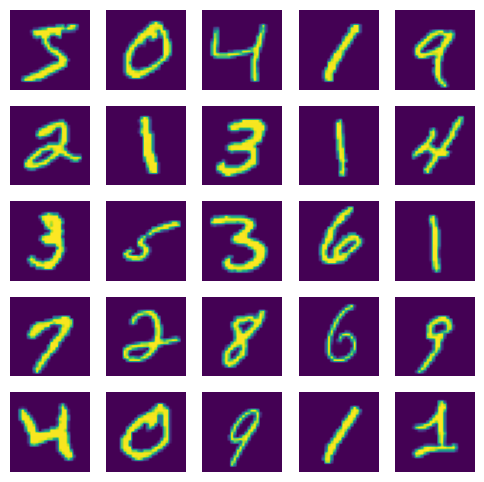

In [8]:
plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = X[i].reshape(28,28)
    plt.imshow(image, cmap='viridis')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

Para graficar lo anterior hemos tomado las 25 primeras instancias. A cada instancia le hemos aplicado un *.reshape* para formar una matriz de $28\times28$ la cual usamos para graficar.

Con esto podemos ver algunos números.

Supongamos que quisieramos ver 25 números $9$, sólo para ver diferencias entre estos.

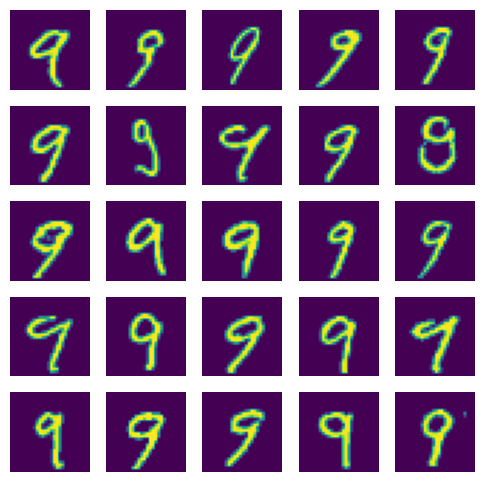

In [9]:
X_5 = X[(y==9)]

plt.figure(figsize=(6,6))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    image = X_5[i].reshape(28,28)
    plt.imshow(image, cmap='viridis')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

## Generando nuestra red

A continuación vamos a usar nuestra clase *ANN* para armar una arquitectura sencilla para clasificar los números dentro del set de datos.

In [10]:
from Layers import Input, Dense
from ANN import NeuralNetwork
from loss_functions import mse, mse_prima
from activationsFunctions import *

input_layer = Input(n_neuronas=(784,))
hidden_layer1 = Dense(ninputs=784, noutputs=100, activation=tanh, activation_prima=tanh_prima,
                      weights_init="uniform", bias_init="zeros", name="DenseLayer1",random_seed=0)

hidden_layer2 = Dense(ninputs=100, noutputs=50, activation=tanh, activation_prima=tanh_prima,
                      weights_init="uniform", bias_init="zeros", name="DenseLayer2",random_seed=0)

output_layer = Dense(ninputs=50, noutputs=1, activation=sigmoid, activation_prima=sigmoid_prima,
                     weights_init="uniform", bias_init="zeros", name="OutputLayer",random_seed=0)

layers = [input_layer,hidden_layer1,hidden_layer2,output_layer] ##lista con mis capas
nn1 = NeuralNetwork(layers) ##creamos la red

nn1.use(loss=mse, loss_prima=mse_prima) ##definimos la función de pérdida

### Preparando los datos

Ahora vamos a preparar los datos para poder clasificar números 5 vs el resto de los números.

In [11]:
filtro_y5 = y==5 ##filtro para obtener los 5
##obtengo un nuevo array y con 1 si es 5 y 0 si no
y5 = np.where(filtro_y5,1,0)
y5 = y5.reshape(-1,1)
y5

array([[1],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [12]:
##me quedo con 5mil datos de X e y5 de manera aleatoria y estratificada
X_train, X_test, y_train, y_test = train_test_split(X, y5, test_size=0.3, stratify=y5)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(49000, 784) (49000, 1)
(21000, 784) (21000, 1)


In [14]:
##analizo las proporciones de 5 en los conjuntos de entrenamiento y test
print(np.mean(y_train).round(3))
print(np.mean(y_test).round(3))

0.09
0.09


In [15]:
##analizamos cuantos 5 y cuantos números diferentes de 5 hay en el conjunto de entrenamiento
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))
##analizamos cuantos 5 y cuantos números diferentes de 5 hay en el conjunto de test
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))

{np.int64(0): np.int64(44581), np.int64(1): np.int64(4419)}
{np.int64(0): np.int64(19106), np.int64(1): np.int64(1894)}


Hemos generado dos nuevos sets y dos nuevos arrays de etiquetas. Uno de estos usaremos para entrenar la red y el otro para testear que tan bien funciona la misma.

In [16]:
nn1.train(X_train, y_train, learning_rate=0.01, epochs=500, tolerancia=1e-3, imprimir_cada=50, batch_size=int(0.05*X_train.shape[0]))

Época 0, MSE: 0.3287450146203433
Época 50, MSE: 0.08121569110758371
Época 100, MSE: 0.06558191266622643
Época 150, MSE: 0.0592793766591125
Época 200, MSE: 0.053941062479728845
Época 250, MSE: 0.045584128658189206
Época 300, MSE: 0.04220181495779975
Época 350, MSE: 0.037004052464021546
Época 400, MSE: 0.03613527136593633
Época 450, MSE: 0.036254680441450894


### Evaluando la performance de la red

Una vez entrenada la red, vamos a analizar qué tan bien clasifica sobre los datos de testeo.

In [20]:
y_pred = nn1.classify(X_test)
y_pred

array([[0],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [27]:
##obtengo algunas métricas como accuracy, precision, recall y f1
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred).round(3))

print("Recall: ", recall_score(y_test, y_pred).round(3))
print("F1: ", f1_score(y_test, y_pred).round(3))

Accuracy:  0.9552380952380952
Precision:  0.84
Recall:  0.622
F1:  0.715


#### Matrices de confusión

Ahora vamos a generar una matriz de confusión.

Pueden leer más sobre esto [aca](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62) y [aca](https://en.wikipedia.org/wiki/Confusion_matrix).

In [54]:
##matriz de confusión
tp = np.sum((y_test==1) & (y_pred==1))
tn = np.sum((y_test==0) & (y_pred==0))
fp = np.sum((y_test==0) & (y_pred==1))
fn = np.sum((y_test==1) & (y_pred==0))

mc = np.array([[tp,fp],[fn,tn]])
#normalizo la matriz de confusión. La normalización se hace dividiendo cada elemento por la suma de la columna
mc_norm = mc/mc.sum(axis=0)

print(mc)
print(mc_norm.round(3)) 

[[ 1179   225]
 [  715 18881]]
[[0.622 0.012]
 [0.378 0.988]]


Grafiquemos la matriz de confusión

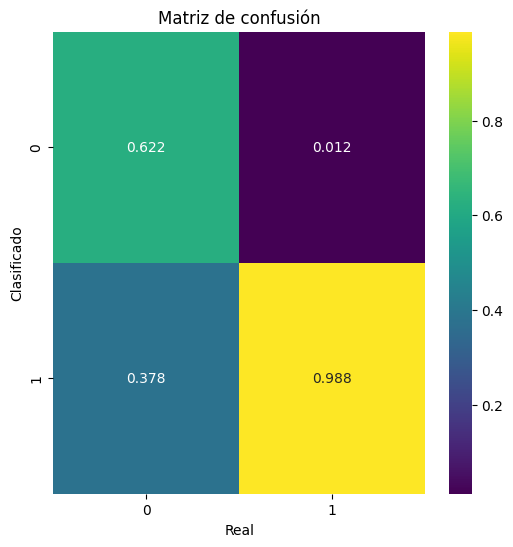

In [58]:
plt.figure(figsize=(6,6))
sns.heatmap(mc_norm.round(3), annot=True, cmap='viridis', fmt='g')
plt.xlabel('Real')
plt.ylabel('Clasificado')
plt.title('Matriz de confusión')
plt.show() 

¿Qué podemos decir de nuestro modelo?

### Mejorando la seguridad de clasificación

Debemos tener en cuenta que nuestra red nos retorna valores entre $0$ y $1$ para cada predicción, esto se corresponde con un valor de probabilidad. Mientras más cercano a $1$ estemos, más *segura* esta la red neuronal de decir que el dato se corresponde a un número $5$.

En general, se asume que todos los valores de probabilidad por encima de $0.5$, es decir, $50\%$ se corresponden a predicciones de la clase de interes. En nuestro contexto, podríamos asumir que los valores de probabilidad por encima de son consideradons números $5$ y el resto, no.

Ahora bien, un valor de $50\%$ de probabilidad implica algo de riesgo, dado que asumimos que la red no está *muy segura* de lo que clasifica. Si este fuera el caso, nosotros podríamos usar la probabilidad de la clasificación y ajustar subir el umbral a valores *más seguros*.